<a href="https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/COMP90049/Week%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/2023/Week%203.ipynb)

In case you forgot or missed the last tute, my name is Khoi.
### When assignment comes out:
* Follow-up questions for the tutes, assignment query: `tuankhoi@unimelb.edu.au` || `tuankhoin@student.unimelb.edu.au`
* 'Dog ate my homework', 'I got covid',...: *Ed forum* && `hasti.samadi@unimelb.edu.au`

### The University of Melbourne, School of Computing and Information Systems
# COMP90049 Introduction to Machine Learning

## Week 3 - Decision Tree & Naive Bayes

- Q: 'How much math will there be in Machine Learning?'
- A: No complex derivative or linear algebra, but yes

👇 What to remember
- Probability
- Entropy, Info Gain, Gain Ratio

---
## Theoretical questions

### Question 1
- Approximately 1% of women aged between 40 and 50 have breast cancer.
- 80% of mammogram screening tests detect breast cancer when it is there.
- 90% of mammograms DO NOT show breast cancer when it’s NOT there.

| Cancer | Probability |
|--------|-------------|
| No     | 99%         |
| Yes    | 1%          |

Based on these information complete the following table

| Cancer | Test | Probability of Test given Cancer: P(T\|C) |
|--------|------|-------------|
| Yes    | +    | 80%         |
| Yes    | -    | `P(-\|Cancer=Yes) = ?`           |
| No     | +    | `P(+\|Cancer=No) = ?`           |
| No     | -    | 90%         |

#### Answer
Fact: Would be good to explain your short-hand notations if you plan to use one. Here:
- `+` means `Test = Positive`
- `-` means `Test = Negative`.

We know that all possibilites add up to 100% right?

- So then if the patient has cancer: `P(Cancer = Yes) = P(+|Cancer=Yes) + P(-|Cancer=Yes) = 100%`
- We already got from the table that `P(+|Cancer=Yes) = 80%`, so `P(-|Cancer=Yes) = 100% - 80% = 20%`

Similar way, we will get `P(+|Cancer=No) = 100% - 10% = 90%`

**FYI**: These are called **False Negatives (FN)** and **False Positives (FP)**. You will learn more about their effect in the later lectures.

### Question 2
Based on the results in question 1, calculate the marginal probability of ‘positive’ results in a mammogram screening test.

#### Answer
*More short-hand notations*:
- $P(!Cancer) = P(Cancer = No)$
- $P(Cancer) = P(Cancer = Yes)$

Now to the working
1. Remember this rule: $P(A) = \sum_nP(A|B_n)P(B_n)$
2. Then: $P(+) = P(+|!Cancer)P(!Cancer) + P(+|Cancer)P(Cancer)$
3. Remember that:
  - $P(!Cancer) = 99\%$ and $P(Cancer) = 1\%$
  - $P(+|Cancer) = 80\%$ and $P(+|!Cancer) = 10\%$
4. Doing the maths, you will get $P(+) = 0.1 \times 0.99 + 0.8 \times 0.01 = 0.107$

FYI: This is the **Joint Probability Distribution** table:

| Cancer/Test | +                         | -                         | **Total** |
|-------------|---------------------------|---------------------------|-----------|
| Yes         | 0.01 x 0.8 = 0.008        | 0.01 x 0.2 = 0.002        | **0.01**  |
| No          | 0.99 x 0.1 = 0.099        | 0.99 x 0.9 = 0.891        | **0.99**  |
| **Total**   | **0.008 + 0.099 = 0.107** | **0.002 + 0.891 = 0.893** | 1         |

The **Total**, row and column, are showing the **Marginal Probability**

### Question 3
Based on the results in question 1, calculate $P(Cancer | +)$, using the Bayes Rule

#### Answer
- Using Bayes Rule: $$P(Cancer|+) = \frac{P(+|Cancer)P(Cancer)}{P(+)}$$
- Substitute the numbers in: $$P(Cancer|+) = \frac{0.8 \times 0.01}{0.107} \approx  7.5\%$$

This result shows that even if a mammography test results returns positive, there is only 7.5% chance that the person actually has Cancer!

### Question 4
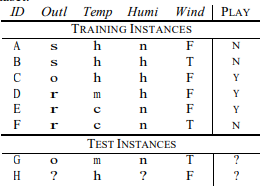

#### i. Describe the test and train instances
<details>
    <summary>Answer</summary>
    Instances A,B,C,D,E and F are our train instances (or observations) in this dataset, and the instances G and H that do not have a label are our test instances.
</details>

#### ii. Build a Naïve Bayes model for the given training instances.

You are just collecting the prior probabilities...
- P(Play = Y) = 0.5
- P(Play = N) = 0.5

...and conditional probabilities
- P(Outl = s | N) = 2/3
- P(Outl = o | N) = 0
- P(Outl = r | N) = 1/3

  - P(Outl = s | Y) = 0
  - P(Outl = o | Y) = 1/3
  - P(Outl = r | Y) = 2/3

- P(Temp = h | N) = 2/3
- P(Temp = m | N) =  0
- P(Temp = c | N) = 1/3

  - P(Temp = h | Y) = 1/3
  - P(Temp = m | Y) = 1/3
  - P(Temp = c | Y) = 1/3

- P(Humi = n | N) = 2/3
- P(Humi = h | N) = 1/3

  - P(Humi = n | Y) = 1/3
  - P(Humi = h | Y) = 2/3

- P(Wind = T | N) = 2/3
- P(Wind = F | N) = 1/3

  - P(Wind = T | Y) = 0
  - P(Wind = F | Y) = 1


### Question 5
Using the Naïve Bayes model that you developed in question 4, classify the given test instances
- No smoothing
- Epsilon smoothing (replace 0 with a small value)
- Laplace smoothing with $\alpha=1$ ($P_i = \frac{x_i+\alpha}{N + \alpha d}$)

Remember: `d` represents the number of instances with the given label in the dataset. If you're calculating `P(something|x)`, `d` is the number of training instances with label `x`.

#### Answer: No smoothing
G:
- $P(G=N) = P(N) \times P(Outl=o|N)P(Temp=m|N)P(Humi=n|N)P(Wind=T|N) \\= 0.5 \times 0 \times 0 \times 2/3 \times 2/3 \\= 0$
- $P(G=Y) = P(Y) \times P(Outl=o|Y)P(Temp=m|Y)P(Humi=n|Y)P(Wind=T|Y) \\= 0.5 \times 1/3 \times 1/3 \times 1/3 \times 0 \\= 0$

H: Ignore the missing instances
- $P(H=N) = P(N) \times P(Temp=h|N)P(Wind=F|N) \\= 1/2 \times 2/3 \times 1/3 \\= 1/9$
- $P(H=N) = P(Y) \times P(Temp=h|Y)P(Wind=F|Y) \\= 1/2 \times 1/3 \times 1 \\= 1/6$

#### Answer: Epsilon smoothing
Just replace any 0 with $\epsilon$

G:
- $P(G=N) = P(N) \times P(Outl=o|N)P(Temp=m|N)P(Humi=n|N)P(Wind=T|N) \\= 0.5 \times \epsilon \times \epsilon \times 2/3 \times 2/3 \\= 2\epsilon^2/9$
- $P(G=Y) = P(Y) \times P(Outl=o|Y)P(Temp=m|Y)P(Humi=n|Y)P(Wind=T|Y) \\= 0.5 \times 1/3 \times 1/3 \times 1/3 \times \epsilon \\= \epsilon/54$

$\epsilon/54 > 2\epsilon^2/9$ for small $\epsilon$ (Rule of thumb: The more $\epsilon$ in it, the smaller)

So Y is more likely for G
<details>
    <summary>We know the answer for H already. Why?</summary>
   No 0 probabilities in the calculation
</details>

#### Answer: Laplace smoothing (let $\alpha=1$)
- Look at the `Outl` attribute: it has 3 different values (s,o,r)

- So $P(Outl = o|Y) = \frac{1+\alpha}{3+3\alpha}=\frac{1+1}{3+3} = \frac{2}{6}$

Try the same for other probabilities in the equation.

The rest of the answer, which I am too lazy to type out:

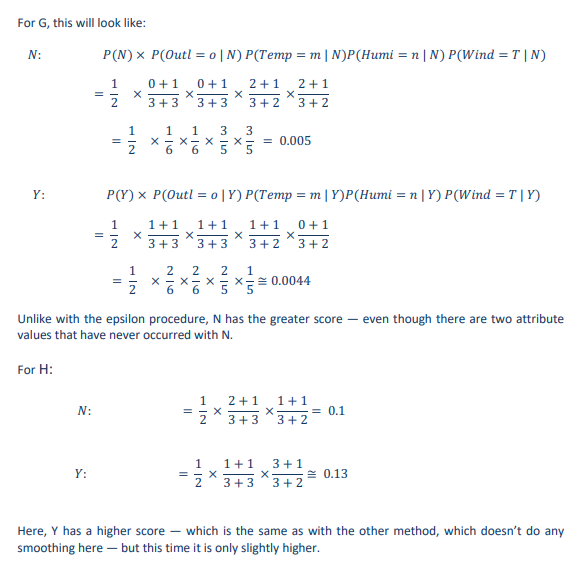

### Extra question (Open-ended)
How suitable do you think the Naive Bayes model is to the given dataset?

*Hint: What does Naive Bayes assume?*

### Question 6

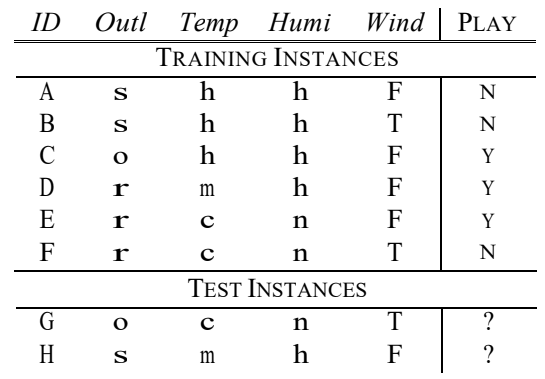



#### (a) Classify with 0R

There are 3 Y and 3 N, so it's a tie. You can either set all to Y or set all to N.

#### (b) Classify with 1R

##### Step 1: Choose an attribute
Say we choose `Outl` in this case, which has 3 possible values: `s`,`o`,`r`

##### Step 2: Evaluate each unique value. Take the majority label in training instances to predict the test instances, add up the errors
- `s`: 2/2 instances are N ▶ Label any instance with `Outl=s` as N
- `o`: 1/1 instances are Y ▶ Label any instance with `Outl=o` as Y
- `r`: 2/3 instances are Y ▶ Label any instance with `Outl=r` as Y (error = 1)

Total error: 0+0+0 = 1

##### Step 3: Rinse and repeat step 1-2 for other attributes, and compare the error to pick the attribute with fewest error
- `Outl`: 1 error
- `Temp`: 2 errors
- `Humi`: 3 errors
- `Wind`: 1 error

Let's pick `Outl` as our 1R standard (can pick `Wind` as well)

##### Step 4: Apply your choice to test instance
- G: `Outl=o` ▶ Label as Y
- H: `Outl=s` ▶ Label as N

#### (c) Classifty with ID3 Decision Tree

##### (i) Information Gain as splitting criteria

###### Step 1: Get the entropies
- Top level (3/6 Y, 3/6 No): $H(R) = -[\frac{3}{6}log_2 (\frac{3}{6}) + \frac{3}{6}log_2 (\frac{3}{6})] = 1$

###### Step 2: Pick an attribute, say `Outl`
  - `Outl=s` (2/2 N): $H(O=o) = 0$
  - `Outl=o` (1/1 Y): $H(O=s) = 0$
  - `Outl=r` (2/3 Y, 1/3 N)P: $H(O=r) = -[\frac{1}{3}log_2 (\frac{1}{3}) + \frac{2}{3}log_2 (\frac{2}{3})] \approx 0.9183$

###### Step 3: Get the Mean Info: $MI(O) = \sum_{i} P(O=i)H(O=i) = \frac{2}{6} \times 0 + \frac{1}{6} \times 0 + \frac{3}{6} \times 0.9183 ≈ 0.4592$

###### Step 4: Get the Information Gain for the chosen attribute
$IG(O) = H(R) - MI(O) = 1 - 0.4592 = 0.5408$

###### Step 5: Rinse and repeat step 2-4 for other attributes. Choose the one with highest IG to split first

You should get the following

Attribute | IG
---|---
Outl | 0.54
Temp | 0.20
Humi | 0
Wind | 0.45

So we split `Outl` first:

[![](https://mermaid.ink/img/pako:eNptj0EKwjAURK8S_qpCe4EsBLUuVdBupOkiNr-2mDYl_UGk6d2NFd3orAbmDcOMUBqFwKHS5l7W0hLLUtGxoFV-cKQLliRLbzxbR-fFbzB4ton2fwLr2THPDLsgG3rdEKEqIIYWbSsbFQbHV0cA1diiAB6skvYmQHRT4FyvJOFWNWQs8ErqAWOQjszp0ZXAyTr8QGkjr1a2Xwrn0u59a343PQGk_Erd?type=png)](https://mermaid.live/edit#pako:eNptj0EKwjAURK8S_qpCe4EsBLUuVdBupOkiNr-2mDYl_UGk6d2NFd3orAbmDcOMUBqFwKHS5l7W0hLLUtGxoFV-cKQLliRLbzxbR-fFbzB4ton2fwLr2THPDLsgG3rdEKEqIIYWbSsbFQbHV0cA1diiAB6skvYmQHRT4FyvJOFWNWQs8ErqAWOQjszp0ZXAyTr8QGkjr1a2Xwrn0u59a343PQGk_Erd)

###### Step 6: Continue the split

So now we only look at 3 instances with `Outl = r`. Remember that the entropy for this is 0.9183

If we split by `Temp`:
- `Temp = m` (1/1 Y): $H(T=m)=0$
- `Temp = c` (1/2 Y, 1/2 N): $H(T=c)=1$

Then:
- $MI(T) = \frac{1}{3} \times 0 + \frac{2}{3} \times 1 ≈ 0.6667$
- $IG(Temp) = H(O=r)-MI(T) = 0.9183-0.6667 ≈ 0.25$

Rinse and repeat for `Humi` and `Wind` we will get $IG(Humi) = 0.25$ and $IG(Wind) = 0.9183$ ▶ We split with `Wind` attribute

The decision tree will become as follows:

[![](https://mermaid.ink/img/pako:eNptj8EOgjAQRH9lsydM4Ac4mKjATU2QxBjKoaFFiNCa0sYY6r9bQLnonjYzbzczA5aScQyxauWjrKnSkEVEgJtNfjS6LSAI1lZa2HqX1a_RW9h5hz-GspDm50awYvbSUQWbWYgX_qMlFhL3HH3suOpow1ycYSQI6pp3nGDoVkbVjSARL8eZO6Oax6zRUmFY0bbnPlKj5ekpSgy1MvwLRQ29KtotFJ-O9nPpqfvrDaaIUMI?type=png)](https://mermaid.live/edit#pako:eNptj8EOgjAQRH9lsydM4Ac4mKjATU2QxBjKoaFFiNCa0sYY6r9bQLnonjYzbzczA5aScQyxauWjrKnSkEVEgJtNfjS6LSAI1lZa2HqX1a_RW9h5hz-GspDm50awYvbSUQWbWYgX_qMlFhL3HH3suOpow1ycYSQI6pp3nGDoVkbVjSARL8eZO6Oax6zRUmFY0bbnPlKj5ekpSgy1MvwLRQ29KtotFJ-O9nPpqfvrDaaIUMI)

Classify result: G is Y, H is N


##### (ii) Gain Ratio as splitting criteria

###### Repeat step 1,2 from last exercise

###### Step 3: Calculate Split Information of `Outl`
Out of 6 instances, there are 2 `Outl = s`, 1 `Outl = o`, 3 `Outl = r`

$SI(Outl) = -[\frac{2}{6}log_2 (\frac{2}{6}) + \frac{1}{6}log_2 (\frac{1}{6}) + \frac{3}{6}log_2 (\frac{3}{6})] ≈ 1.459$

##### Step 4: Get Gain Ratio
$GR(O) = \frac{IG(O)}{SI(O)} = 0.5408 \div 1.459 \approx 0.3707$

Repeat for other attributes and you will get:
- $GR(Temp) = 0.14$
- $GR(Humi) = 0$
- $GR(Wind) = 0.5$

`Wind` has highest Gain Ratio so we split with `Wind` first. All `Wind = T` leads to label N so we only care about `Wind = F` instances in the next split.

[![](https://mermaid.ink/img/pako:eNo9j8EOgjAQRH9lsydI4Ac4mJiAN71IwsF6WOkijbQlpcQY4N-toM5ps_NmszNhbSVjhk1nn3VLzkOZCwNBFaTpDuZyhiI6xd_dpVJGXjfnMMM-Ki3cGIa-U96zjDFBzU6TkuHm9AkJ9C1rFpiFUZJ7CBRmCdzYS_JcSOWtw6yhbuAEafT2_DI1Zt6N_INyRXdH-k_xGjpun68FljeZw0EI?type=png)](https://mermaid.live/edit#pako:eNo9j8EOgjAQRH9lsydI4Ac4mJiAN71IwsF6WOkijbQlpcQY4N-toM5ps_NmszNhbSVjhk1nn3VLzkOZCwNBFaTpDuZyhiI6xd_dpVJGXjfnMMM-Ki3cGIa-U96zjDFBzU6TkuHm9AkJ9C1rFpiFUZJ7CBRmCdzYS_JcSOWtw6yhbuAEafT2_DI1Zt6N_INyRXdH-k_xGjpun68FljeZw0EI)

##### Step 5: Continue the split

So now we only look at 3 instances with `Wind = F`. Do the same as step 6 in the previous exercise, but use Gain Ratio instead of Information Gain. You should have `Outl` as the highest Gain Ratio at 0.5408

[![](https://mermaid.ink/img/pako:eNptj8EKgkAQhl9lmJOBvoCHwNJuFZQg4npY3DUl3Y11lwi3d29V8lJz-pnvG5h_xEoyjiHWnXxWDVUa0pgIcBMVZ6O7EoJga6WFnZdvfsFgYe-d_gBl4VLk5QKyaQU2tZCsclZkrWDlQg4WIvSx56qnLXPvjJNEUDe85wRDFxlVd4JEvJ1nHoxqnrBWS4VhTbuB-0iNlteXqDDUyvCvFLf0pmi_Wnw-Oi6l5-7vD9BFUS4?type=png)](https://mermaid.live/edit#pako:eNptj8EKgkAQhl9lmJOBvoCHwNJuFZQg4npY3DUl3Y11lwi3d29V8lJz-pnvG5h_xEoyjiHWnXxWDVUa0pgIcBMVZ6O7EoJga6WFnZdvfsFgYe-d_gBl4VLk5QKyaQU2tZCsclZkrWDlQg4WIvSx56qnLXPvjJNEUDe85wRDFxlVd4JEvJ1nHoxqnrBWS4VhTbuB-0iNlteXqDDUyvCvFLf0pmi_Wnw-Oi6l5-7vD9BFUS4)